In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import pickle

In [2]:
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('train.csv',encoding='latin1')

In [4]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [5]:
# EDA (Exploratory Data Analysis)
print("Dataset Overview:")
print(df.head())

Dataset Overview:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346   

In [6]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [7]:
#Analyzing The Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [9]:
df.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27476    False
27477    False
27478    False
27479    False
27480    False
Length: 27481, dtype: bool

In [11]:
#Data Wrangling

<Axes: >

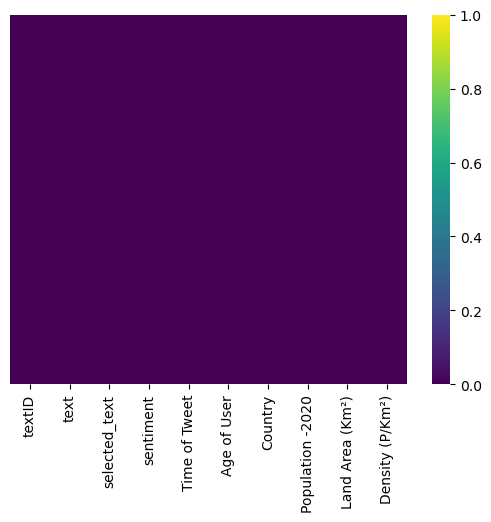

In [12]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
#1 Missing Value

In [13]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [14]:
len(df)

27481

In [15]:
df.shape

(27481, 10)

In [16]:
df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

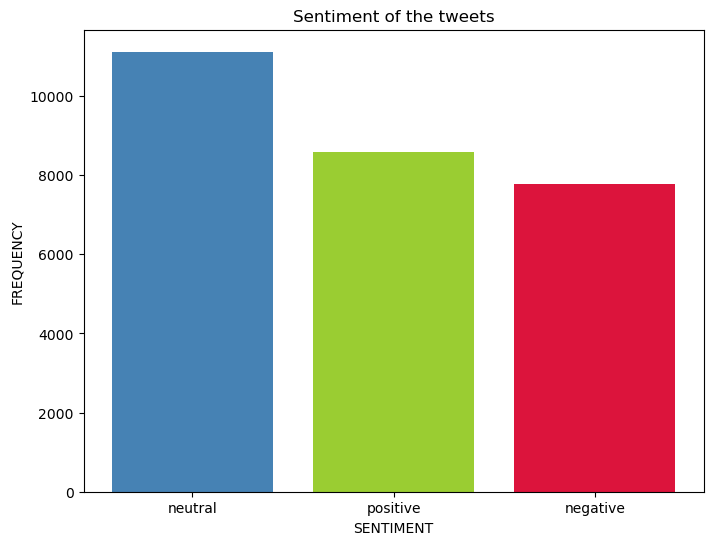

In [17]:
# Get the frequency of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Bar plot of the sentiments in the tweet
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['SteelBlue', 'YellowGreen', 'Crimson'])
plt.xlabel("SENTIMENT")
plt.ylabel("FREQUENCY")
plt.title("Sentiment of the tweets")
plt.show()

In [18]:
# Data Cleaning a
df = df[['text', 'sentiment']]
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [19]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27475,wish we could come see u on Denver husband l...,negative
27476,I`ve wondered about rake to. The client has ...,negative
27477,Yay good for both of you. Enjoy the break - y...,positive
27478,But it was worth it ****.,positive


In [20]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

<Axes: >

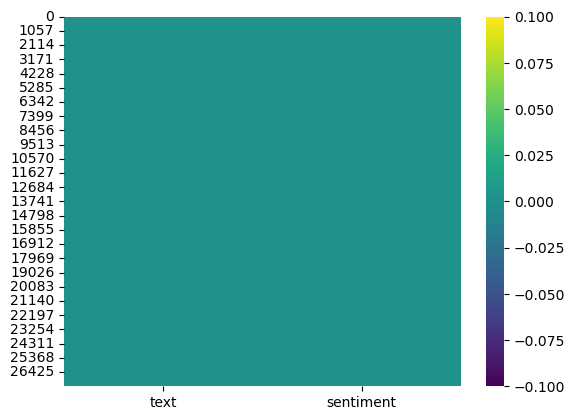

In [21]:
sns.heatmap(df.isnull(), linecolor="red",cmap="viridis")
# Perfectly Clean Data


In [22]:
df.head(5)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [23]:
#Text Processing

In [24]:
# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)
df

,text,sentiment,tokens
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]"
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,..."
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]"
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]"
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t..."
...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu..."
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ..."
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,..."
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]"


In [25]:
#To check the Word count of the Tweet
# Add a new column 'word_count' to the DataFrame
df['word_count'] = df['tokens'].apply(len)

# Print the DataFrame with the word count
df

,text,sentiment,tokens,word_count
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20
...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10


In [26]:
##To check the character count of the Tweet
# Calculate character count for each row in 'tokens' column
df['char_count'] = df['tokens'].apply(lambda tokens: len(''.join(tokens)))

# Print the DataFrame with token character count
df[['text', 'tokens', 'char_count']].head()


,text,tokens,char_count
0,"I`d have responded, if I were going","[I, `, d, have, responded, ,, if, I, were, going]",29
1,Sooo SAD I will miss you here in San Diego!!!,"[Sooo, SAD, I, will, miss, you, here, in, San,...",36
2,my boss is bullying me...,"[my, boss, is, bullying, me, ...]",21
3,what interview! leave me alone,"[what, interview, !, leave, me, alone]",26
4,"Sons of ****, why couldn`t they put them on t...","[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",61


In [27]:
df

,text,sentiment,tokens,word_count,char_count
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61
...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20


In [28]:
# Calculate average word length for each tweet
df['avg_word_length'] = df.apply(lambda row: row['char_count'] / row['word_count'], axis=1)

# Print the DataFrame with the average word length
df[['tokens', 'avg_word_length']].head()


,tokens,avg_word_length
0,"[I, `, d, have, responded, ,, if, I, were, going]",2.900000
1,"[Sooo, SAD, I, will, miss, you, here, in, San,...",2.769231
2,"[my, boss, is, bullying, me, ...]",3.500000
3,"[what, interview, !, leave, me, alone]",4.333333
4,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",3.050000


In [29]:
df

,text,sentiment,tokens,word_count,char_count,avg_word_length
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000
...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000


In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JIJI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
#find out the count of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = df['tokens'].apply(lambda x: len([word for word in x if word.lower() in stop]))
df[['text','stopwords']].head()


,text,stopwords
0,"I`d have responded, if I were going",6
1,Sooo SAD I will miss you here in San Diego!!!,5
2,my boss is bullying me...,3
3,what interview! leave me alone,2
4,"Sons of ****, why couldn`t they put them on t...",9


In [32]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
#find out the hastags
import re

# Define a regular expression pattern to match hashtags
pattern = r'\#\w+'

# Function to count hashtags
def count_hashtags(tokens):
    hashtags = [token for token in tokens if re.match(pattern, token)]
    return len(hashtags)

# Apply the function to count hashtags in each row
df['hashtags'] = df['tokens'].apply(count_hashtags)



In [34]:
df.head(5)

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0


In [35]:
#check numerics present
def count_numerics(tokens):
    numerics = [token for token in tokens if token.isdigit()]
    return len(numerics)

# Apply the function to count numeric tokens in each row
df['numerics'] = df['tokens'].apply(count_numerics)
df

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0
...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0


In [36]:
# Apply a lambda function to count uppercase words in each row
df['upper'] = df['tokens'].apply(lambda tokens: sum(1 for token in tokens if token.isupper()))

df

#Upper Case Characters Presnt in Datset

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics,upper
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0


In [37]:
df.tail()


,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics,upper
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0
27479,All this flirting going on - The ATG smiles...,neutral,"[All, this, flirting, going, on, -, The, ATG, ...",17,48,2.823529,4,0,0,1


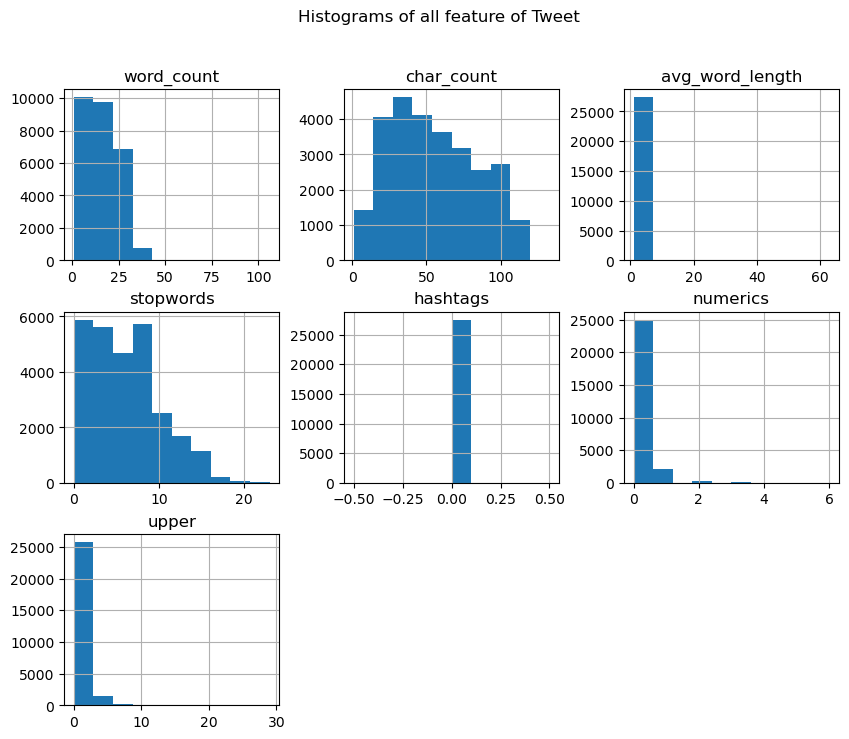

In [38]:
# Data visualization of the features of tweet
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of all feature of Tweet")
plt.show()

In [39]:
#Data  Cleaning

In [40]:
import re
from nltk.corpus import stopwords

In [41]:
# Lowercasing
df['clean_text'] = df['text'].str.lower()

In [42]:
# Removing Punctuation and Special Characters
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')

C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\2609407851.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace('[^\w\s]', '')


In [43]:
# Removing Stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics,upper,clean_text
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,sons couldnt put releases already bought
...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,ive wondered rake client made clear net dont f...
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good enjoy break probably need hectic week...
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth


In [44]:
# Removing Numerics
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\d+', '', x))
df

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics,upper,clean_text
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,sons couldnt put releases already bought
...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,ive wondered rake client made clear net dont f...
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good enjoy break probably need hectic week...
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth


In [45]:
# Removing Uppercase Tokens
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if not word.isupper()]))
df

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics,upper,clean_text
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,sons couldnt put releases already bought
...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,ive wondered rake client made clear net dont f...
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good enjoy break probably need hectic week...
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth


In [46]:
# Removing Hashtags
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'#\w+', '', x))


In [47]:
# Recalculate word count, character count, and average word length
df['clean_word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['clean_char_count'] = df['clean_text'].apply(len)
df['clean_avg_word_length'] = df['clean_char_count'] / df['clean_word_count']
df

,text,sentiment,tokens,word_count,char_count,avg_word_length,stopwords,hashtags,numerics,upper,clean_text,clean_word_count,clean_char_count,clean_avg_word_length
0,"I`d have responded, if I were going",neutral,"[I, `, d, have, responded, ,, if, I, were, going]",10,29,2.900000,6,0,0,2,id responded going,3,18,6.000000
1,Sooo SAD I will miss you here in San Diego!!!,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,...",13,36,2.769231,5,0,0,2,sooo sad miss san diego,5,23,4.600000
2,my boss is bullying me...,negative,"[my, boss, is, bullying, me, ...]",6,21,3.500000,3,0,0,0,boss bullying,2,13,6.500000
3,what interview! leave me alone,negative,"[what, interview, !, leave, me, alone]",6,26,4.333333,2,0,0,0,interview leave alone,3,21,7.000000
4,"Sons of ****, why couldn`t they put them on t...",negative,"[Sons, of, *, *, *, *, ,, why, couldn, `, t, t...",20,61,3.050000,9,0,0,0,sons couldnt put releases already bought,6,40,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,wish we could come see u on Denver husband l...,negative,"[wish, we, could, come, see, u, on, Denver, hu...",18,60,3.333333,7,0,0,0,wish could come see u denver husband lost job ...,11,57,5.181818
27476,I`ve wondered about rake to. The client has ...,negative,"[I, `, ve, wondered, about, rake, to, ., The, ...",31,97,3.129032,12,0,0,2,ive wondered rake client made clear net dont f...,15,82,5.466667
27477,Yay good for both of you. Enjoy the break - y...,positive,"[Yay, good, for, both, of, you, ., Enjoy, the,...",23,88,3.826087,9,0,0,0,yay good enjoy break probably need hectic week...,12,68,5.666667
27478,But it was worth it ****.,positive,"[But, it, was, worth, it, *, *, *, *, .]",10,20,2.000000,4,0,0,0,worth,1,5,5.000000


In [48]:
# Display the cleaned data
cleaned_df = df[['clean_text', 'sentiment', 'clean_word_count', 'clean_char_count', 'clean_avg_word_length']]

In [49]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,sooo sad miss san diego,negative,5,23,4.600000
2,boss bullying,negative,2,13,6.500000
3,interview leave alone,negative,3,21,7.000000
4,sons couldnt put releases already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake client made clear net dont f...,negative,15,82,5.466667
27477,yay good enjoy break probably need hectic week...,positive,12,68,5.666667
27478,worth,positive,1,5,5.000000


In [50]:
#Commonly Used Words And Thier Count
freq = pd.Series(' '.join(cleaned_df['clean_text']).split()).value_counts()[:10]


In [51]:
freq

im       3025
day      2085
good     1549
get      1427
like     1346
go       1266
dont     1200
love     1122
work     1112
today    1097
dtype: int64

In [52]:
#Removing the Common Words
freq = list(freq.index)
cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
cleaned_df['clean_text'].head()



C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\1787808752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


0                          id responded going
1                     sooo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: clean_text, dtype: object

In [53]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,sooo sad miss san diego,negative,5,23,4.600000
2,boss bullying,negative,2,13,6.500000
3,interview leave alone,negative,3,21,7.000000
4,sons couldnt put releases already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake client made clear net force ...,negative,15,82,5.466667
27477,yay enjoy break probably need hectic weekend t...,positive,12,68,5.666667
27478,worth,positive,1,5,5.000000


In [54]:
# Rare Words From Dataset
freq1 = pd.Series(' '.join(['clean_text']).split()).value_counts()[-10:]


In [55]:
freq1

clean_text    1
dtype: int64

In [56]:
#Removing Rare Words From Dataset
freq1 = list(freq1.index)
cleaned_df['clean_text'] = cleaned_df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
cleaned_df['clean_text'].head()



C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\571086963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'] = cleaned_df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))


0                          id responded going
1                     sooo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: clean_text, dtype: object

In [57]:
# Remove URLs from the 'text' column
cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))

# Display the modified DataFrame
cleaned_df['clean_text']

C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\2079329718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))


0                                       id responded going
1                                  sooo sad miss san diego
2                                            boss bullying
3                                    interview leave alone
4                 sons couldnt put releases already bought
                               ...                        
27475    wish could come see u denver husband lost job ...
27476    ive wondered rake client made clear net dont f...
27477    yay good enjoy break probably need hectic week...
27478                                                worth
27479                   flirting going atg smiles yay hugs
Name: clean_text, Length: 27480, dtype: object

In [58]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,sooo sad miss san diego,negative,5,23,4.600000
2,boss bullying,negative,2,13,6.500000
3,interview leave alone,negative,3,21,7.000000
4,sons couldnt put releases already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake client made clear net dont f...,negative,15,82,5.466667
27477,yay good enjoy break probably need hectic week...,positive,12,68,5.666667
27478,worth,positive,1,5,5.000000


In [59]:
# Stemming
st = PorterStemmer()
cleaned_df['clean_text'][:5].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,sooo sad miss san diego,negative,5,23,4.600000
2,boss bullying,negative,2,13,6.500000
3,interview leave alone,negative,3,21,7.000000
4,sons couldnt put releases already bought,negative,6,40,6.666667
...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818
27476,ive wondered rake client made clear net dont f...,negative,15,82,5.466667
27477,yay good enjoy break probably need hectic week...,positive,12,68,5.666667
27478,worth,positive,1,5,5.000000


In [60]:
# Advanced text processing
from textblob import TextBlob
import pandas as pd



# Apply word correction to the first 5 rows of the 'text' column
cleaned_df['clean_text'][:5] = df['clean_text'][:5].apply(lambda x: str(TextBlob(x).correct()))

# Display the modified DataFrame
print(cleaned_df['clean_text'][:5])


0                        id responded going
1                   soon sad miss san diego
2                             boss building
3                     interview leave alone
4    sons couldn put release already bought
Name: clean_text, dtype: object


C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\3893982286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['clean_text'][:5] = df['clean_text'][:5].apply(lambda x: str(TextBlob(x).correct()))


In [61]:
TextBlob(cleaned_df['clean_text'][0]).words

WordList(['id', 'responded', 'going'])

In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JIJI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
TextBlob(cleaned_df['clean_text'][1]).words

WordList(['soon', 'sad', 'miss', 'san', 'diego'])

In [64]:
#Advanced Text Processing

In [65]:
#N-grams are the combination of multiple words used together.
TextBlob(cleaned_df['clean_text'][0]).ngrams(2)



[WordList(['id', 'responded']), WordList(['responded', 'going'])]

In [66]:
#Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

tf1 = (cleaned_df['clean_text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1


,words,tf
0,soon,1
1,sad,1
2,miss,1
3,san,1
4,diego,1


In [67]:
import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(cleaned_df.shape[0]/(len(cleaned_df[cleaned_df['clean_text'].str.contains(word)])))
tf1
#The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing
#in all the documents.

,words,tf,idf
0,soon,1,4.481421
1,sad,1,3.837707
2,miss,1,3.325531
3,san,1,5.152310
4,diego,1,7.736307


In [68]:


tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1
#TF-IDF is the multiplication of the TF and IDF which we calculated above.



,words,tf,idf,tfidf
0,soon,1,4.481421,4.481421
1,sad,1,3.837707,3.837707
2,miss,1,3.325531,3.325531
3,san,1,5.152310,5.152310
4,diego,1,7.736307,7.736307


In [69]:
df_copy=cleaned_df

In [70]:
df_copy.head()


,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length
0,id responded going,neutral,3,18,6.000000
1,soon sad miss san diego,negative,5,23,4.600000
2,boss building,negative,2,13,6.500000
3,interview leave alone,negative,3,21,7.000000
4,sons couldn put release already bought,negative,6,40,6.666667


In [71]:
#saving dataset to csv format
cleaned_df.to_csv('cleanedtwitter.csv')

In [72]:
from wordcloud import WordCloud
from PIL import Image
import requests


In [73]:
all_words = ' '.join([text for text in cleaned_df['clean_text']])

In [74]:
all_words

'id responded going soon sad miss san diego boss building interview leave alone sons couldn put release already bought  shameless plugging best rangers forum earth am feedings baby fun smiles coos soooo high  journey wow u became cooler hehe possible much love hopeful reckon chances minimal p im never gonna get cake stuff really really like song love story taylor swift sharpie running dangerously low ink want go music tonight lost voice test test lg env uh oh sunburned sok trying plot alternatives speak sigh ive sick past days thus hair looks wierd didnt hat would look  back home gonna miss every one hes oh marly im sorry hope find soon playing ghost online really interesting new updates kirin pet metamorph third job cant wait dragon pet cleaning house family comming later today gotta restart computer thought win supposed put end constant rebootiness see wat mean bout follw friidays called lose fllowers friday smh free fillin app ipod fun im addicted im sorry way malaysiano internet ac

In [75]:
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(clean_text):
    # Create a TextBlob object
    blob = TextBlob(clean_text)
    # Get the polarity score
    polarity = blob.sentiment.polarity
    # Assign sentiment labels based on polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [76]:
# Apply sentiment analysis to the 'clean_text' column
cleaned_df['sentiment_textblob'] = df['clean_text'].apply(analyze_sentiment)
cleaned_df

C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\279173101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sentiment_textblob'] = df['clean_text'].apply(analyze_sentiment)


,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob
0,id responded going,neutral,3,18,6.000000,neutral
1,soon sad miss san diego,negative,5,23,4.600000,negative
2,boss building,negative,2,13,6.500000,neutral
3,interview leave alone,negative,3,21,7.000000,neutral
4,sons couldn put release already bought,negative,6,40,6.666667,neutral
...,...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818,neutral
27476,ive wondered rake client made clear net dont f...,negative,15,82,5.466667,positive
27477,yay good enjoy break probably need hectic week...,positive,12,68,5.666667,positive
27478,worth,positive,1,5,5.000000,positive


In [77]:
cleaned_df.tail(20)

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob
27460,thanks dear neighboor also gave coffee needed ...,positive,8,50,6.250000,positive
27461,back bingo wfamily fun night,positive,5,28,5.600000,positive
27462,like drew said give tc chance miss thomas move...,negative,11,66,6.000000,neutral
27463,rec gametrying crythe pain muchi need himcant ...,negative,11,69,6.272727,neutral
27464,sure ill try n keep p enjoy studying cya,positive,9,40,4.444444,positive
27465,naw pretty tame guy costume voyagerstyle medic...,neutral,11,80,7.272727,negative
27466,morning twitfriends welcome new followers,positive,5,41,8.200000,positive
27467,grilled mushrooms olives feta cheese coffee br...,neutral,9,63,7.000000,neutral
27468,days till bh comes back la,neutral,6,26,4.333333,neutral
27469,lol know hahadid fall asleep get bored shaun p...,negative,10,51,5.100000,positive


In [78]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'sentiment' is the column you want to encode
label_encoder = LabelEncoder()

# Apply label encoding to the 'sentiment' column
df_copy['sentiment_encoded'] = label_encoder.fit_transform(df_copy['sentiment'])

# Display the modified DataFrame
print(df_copy[['sentiment', 'sentiment_encoded']])


      sentiment  sentiment_encoded
0       neutral                  1
1      negative                  0
2      negative                  0
3      negative                  0
4      negative                  0
...         ...                ...
27475  negative                  0
27476  negative                  0
27477  positive                  2
27478  positive                  2
27479   neutral                  1

[27480 rows x 2 columns]


C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\3830526792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['sentiment_encoded'] = label_encoder.fit_transform(df_copy['sentiment'])


In [79]:
# Function to get polarity and subjectivity using TextBlob
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# Apply the functions to the 'clean_text' column
cleaned_df['polarity'] = cleaned_df['clean_text'].apply(get_polarity)
cleaned_df['subjectivity'] = cleaned_df['clean_text'].apply(get_subjectivity)

C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\1636059266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['polarity'] = cleaned_df['clean_text'].apply(get_polarity)
C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\1636059266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['subjectivity'] = cleaned_df['clean_text'].apply(get_subjectivity)


In [80]:
cleaned_df

,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob,sentiment_encoded,polarity,subjectivity
0,id responded going,neutral,3,18,6.000000,neutral,1,0.000000,0.00000
1,soon sad miss san diego,negative,5,23,4.600000,negative,0,-0.500000,1.00000
2,boss building,negative,2,13,6.500000,neutral,0,0.000000,0.00000
3,interview leave alone,negative,3,21,7.000000,neutral,0,0.000000,0.00000
4,sons couldn put release already bought,negative,6,40,6.666667,neutral,0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818,neutral,0,0.000000,0.00000
27476,ive wondered rake client made clear net dont f...,negative,15,82,5.466667,positive,0,0.184091,0.39697
27477,yay good enjoy break probably need hectic week...,positive,12,68,5.666667,positive,2,0.550000,0.55000
27478,worth,positive,1,5,5.000000,positive,2,0.300000,0.10000


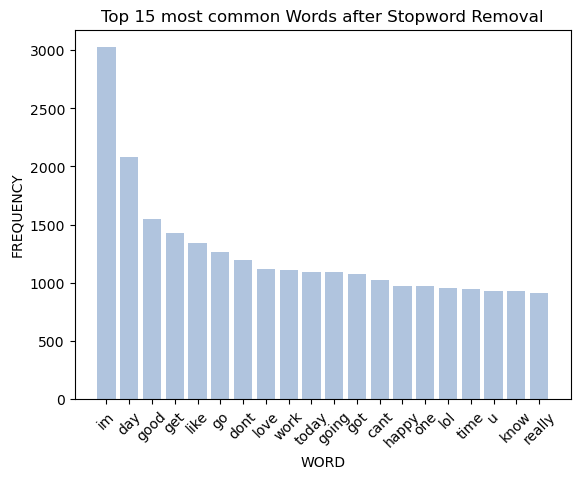

In [81]:
# Split the text into individual words
all_words = all_words.split()

# Count the occurrence of each word
word_counts = Counter(all_words)

# Get the top 15 most common words
top_words = word_counts.most_common(20)

# Create a bar plot for the top words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color="LightSteelBlue")

# Add labels and title
plt.xlabel('WORD')
plt.ylabel('FREQUENCY')
plt.title('Top 15 most common Words after Stopword Removal')

# Rotate x-tick label for better readability
plt.xticks(rotation=45)

# Display plot
plt.show()

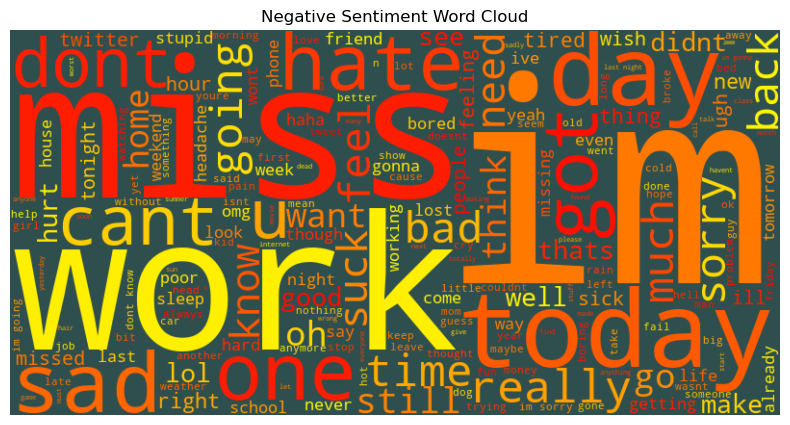

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataframe for negative sentiment
negative_df = cleaned_df[cleaned_df['sentiment'] == 'negative']

# Concatenate clean_text for negative sentiment
negative_text = ' '.join(negative_df['clean_text'])

# Generate and display word cloud for negative sentiment
wordcloud = WordCloud(width=800, height=400, background_color="DarkSlateGray",colormap = 'autumn').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()


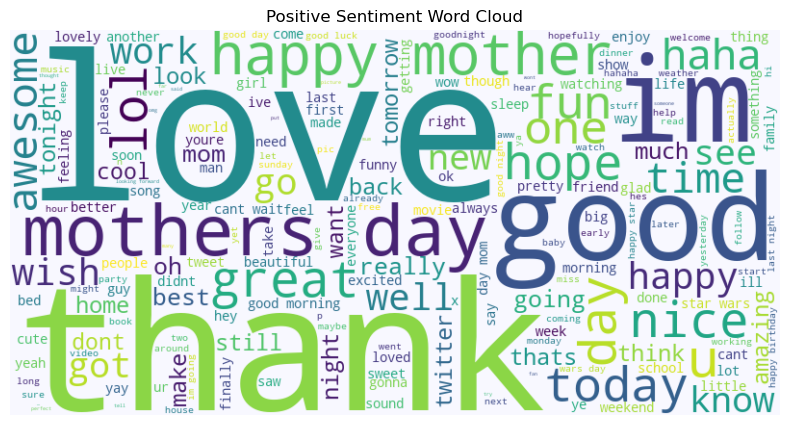

In [83]:
# Filter the dataframe for positive sentiment
positive_df = cleaned_df[cleaned_df['sentiment'] == 'positive']

# Concatenate clean_text for positive sentiment
positive_text = ' '.join(positive_df['clean_text'])

# Generate and display word cloud for positive sentiment
wordcloud = WordCloud(width=800, height=400, background_color="GhostWhite", colormap="viridis").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()


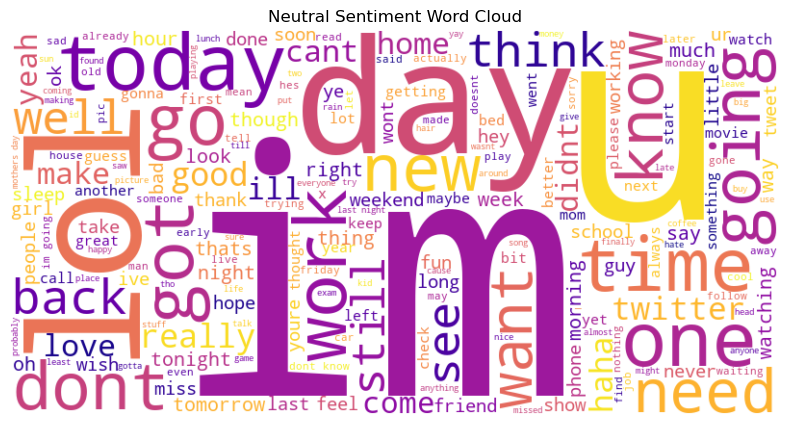

In [84]:
# Filter the dataframe for neutral sentiment
neutral_df = cleaned_df[cleaned_df['sentiment'] == 'neutral']

# Concatenate clean_text for neutral sentiment
neutral_text = ' '.join(neutral_df['clean_text'])

# Generate and display word cloud for neutral sentiment
wordcloud =WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud')
plt.show()


In [85]:
cleaned_df.to_csv('Cleaned_Tweet.csv')

In [86]:
#Text Classification and Machine Learning

In [87]:
#One hot encoding (Bag of words)


In [88]:
 #Text Classification using Machine Learning
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cleaned_df['clean_text'], cleaned_df['sentiment'], test_size=0.2, random_state=42)


In [89]:
X_train

21208         oh hes hilarious im commenting fact hes much
18264    thanks trying hoping bud trillin fest would ho...
9683                 show house rocked saying goodbye soon
9688     am west coast timegettin ready catch flight ba...
22727    computer slooowww morning think sign go home p...
                               ...                        
21575                               feels like warm things
5390                             best friend vegas without
860                              fire urban rock challenge
15795                                       effort though 
23654                 claire love show got office am radio
Name: clean_text, Length: 21984, dtype: object

In [90]:
y_train

21208    positive
18264    positive
9683      neutral
9688     positive
22727     neutral
           ...   
21575     neutral
5390      neutral
860       neutral
15795    positive
23654    positive
Name: sentiment, Length: 21984, dtype: object

In [91]:
X_test

1588                        enjoy family trumps everything
10413                  kinda turns buy dig deeper hole etc
6561                                   clive birthday pat 
2602                                          congrats hey
4003                                               texting
                               ...                        
12295    investigated whether could change username erm...
616                          one know likes boiled peanuts
4504     awww whered get hugh thin traces wolverine yet...
14491          im craving cinnamon toast crunch cold today
24838    im buffalo worshipper maybe time pay visit pre...
Name: clean_text, Length: 5496, dtype: object

In [92]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [93]:
# Vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [94]:
# Save the fitted TF-IDF vectorizer using pickle
import pickle
vectorizer_file_path = "tfidf_vectorizer.pkl"
with open(vectorizer_file_path, "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

In [95]:
X_train_tfidf

<21984x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 130195 stored elements in Compressed Sparse Row format>

In [96]:
X_test_tfidf

<5496x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 31914 stored elements in Compressed Sparse Row format>

In [97]:
cleaned_df.to_csv('newtwitter.csv')

In [98]:
cleaned_df.isnull().any()

clean_text               False
sentiment                False
clean_word_count         False
clean_char_count         False
clean_avg_word_length     True
sentiment_textblob       False
sentiment_encoded        False
polarity                 False
subjectivity             False
dtype: bool

In [99]:
cleaned_df.dropna(inplace=True)
cleaned_df

C:\Users\JIJI\AppData\Local\Temp\ipykernel_12764\265941159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(inplace=True)


,clean_text,sentiment,clean_word_count,clean_char_count,clean_avg_word_length,sentiment_textblob,sentiment_encoded,polarity,subjectivity
0,id responded going,neutral,3,18,6.000000,neutral,1,0.000000,0.00000
1,soon sad miss san diego,negative,5,23,4.600000,negative,0,-0.500000,1.00000
2,boss building,negative,2,13,6.500000,neutral,0,0.000000,0.00000
3,interview leave alone,negative,3,21,7.000000,neutral,0,0.000000,0.00000
4,sons couldn put release already bought,negative,6,40,6.666667,neutral,0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
27475,wish could come see u denver husband lost job ...,negative,11,57,5.181818,neutral,0,0.000000,0.00000
27476,ive wondered rake client made clear net dont f...,negative,15,82,5.466667,positive,0,0.184091,0.39697
27477,yay good enjoy break probably need hectic week...,positive,12,68,5.666667,positive,2,0.550000,0.55000
27478,worth,positive,1,5,5.000000,positive,2,0.300000,0.10000


In [100]:
cleaned_df.isnull().any()

clean_text               False
sentiment                False
clean_word_count         False
clean_char_count         False
clean_avg_word_length    False
sentiment_textblob       False
sentiment_encoded        False
polarity                 False
subjectivity             False
dtype: bool

In [101]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Train and evaluate different classifiers
def train_and_evaluate_classifier(classifier, name):
    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_tfidf)

    # Evaluate the model
    print(f"\n{name} Classifier:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

        # Visualize the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=cleaned_df['sentiment'].unique())
    plt.figure(figsize=(8, 6))
    # Set colormap based on the classifier
    cmap = None
    if name == "Logistic Regression":
        cmap = 'viridis'
    elif name == "Support Vector Machine":
        cmap = 'magma'
    elif name == "Naive Bayes":
        cmap = 'summer'
    elif name == "Random Forest":
        cmap = 'winter'
    # Change the colormap here
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=cleaned_df['sentiment'].unique(), 
                yticklabels=cleaned_df['sentiment'].unique(), cmap=cmap)
    plt.title(f"{name} Classifier - Confusion Matrix")
    plt.show()


Logistic Regression Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.57      0.64      1572
     neutral       0.63      0.75      0.68      2236
    positive       0.77      0.71      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.70      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



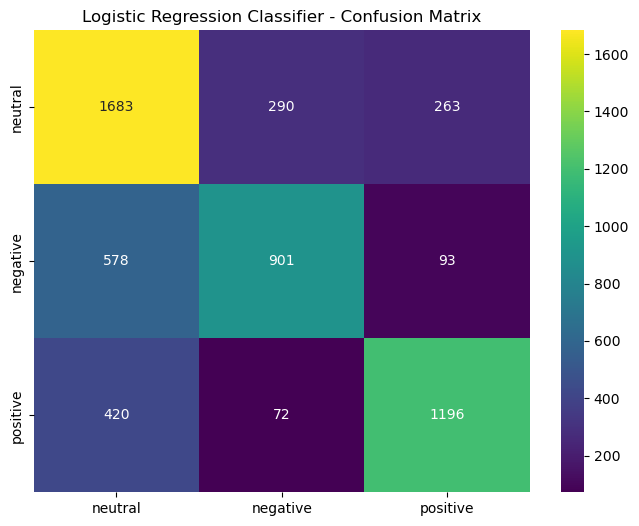

In [102]:
from sklearn.linear_model import LogisticRegression
# Train and evaluate Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000)
train_and_evaluate_classifier(logistic_regression_classifier, "Logistic Regression")


Support Vector Machine Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.57      0.64      1572
     neutral       0.64      0.77      0.70      2236
    positive       0.79      0.72      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.72      0.69      0.70      5496
weighted avg       0.71      0.70      0.70      5496



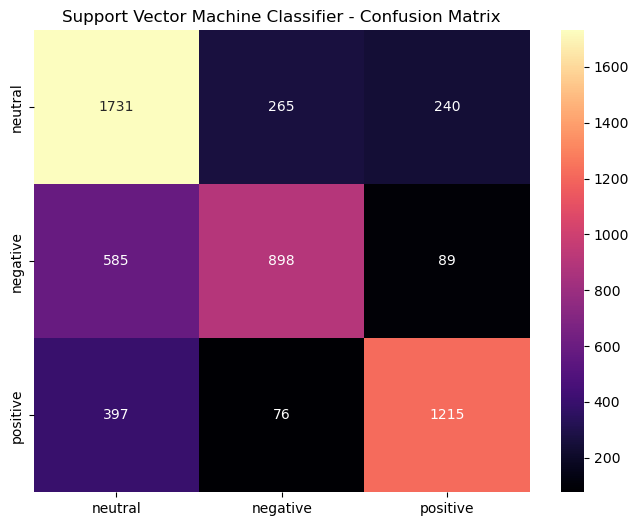

In [103]:
from sklearn.svm import SVC
# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='linear')
train_and_evaluate_classifier(svm_classifier, "Support Vector Machine")



Random Forest Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.59      0.65      1572
     neutral       0.66      0.73      0.69      2236
    positive       0.73      0.77      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.70      0.70      5496
weighted avg       0.70      0.70      0.70      5496



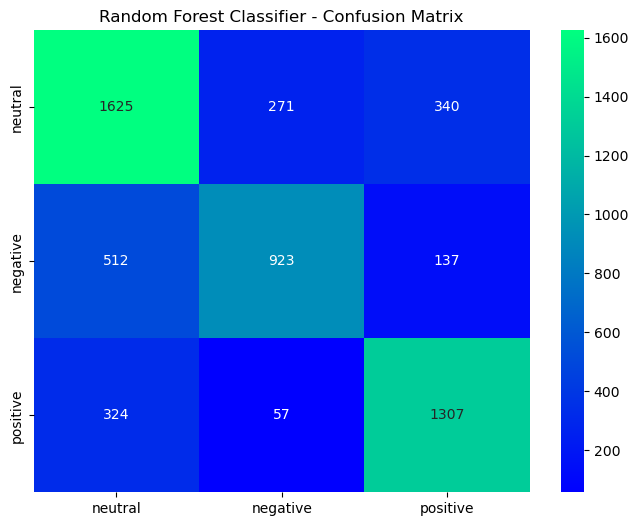

In [104]:
from sklearn.ensemble import RandomForestClassifier
# Train and evaluate Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_classifier(random_forest_classifier, "Random Forest")

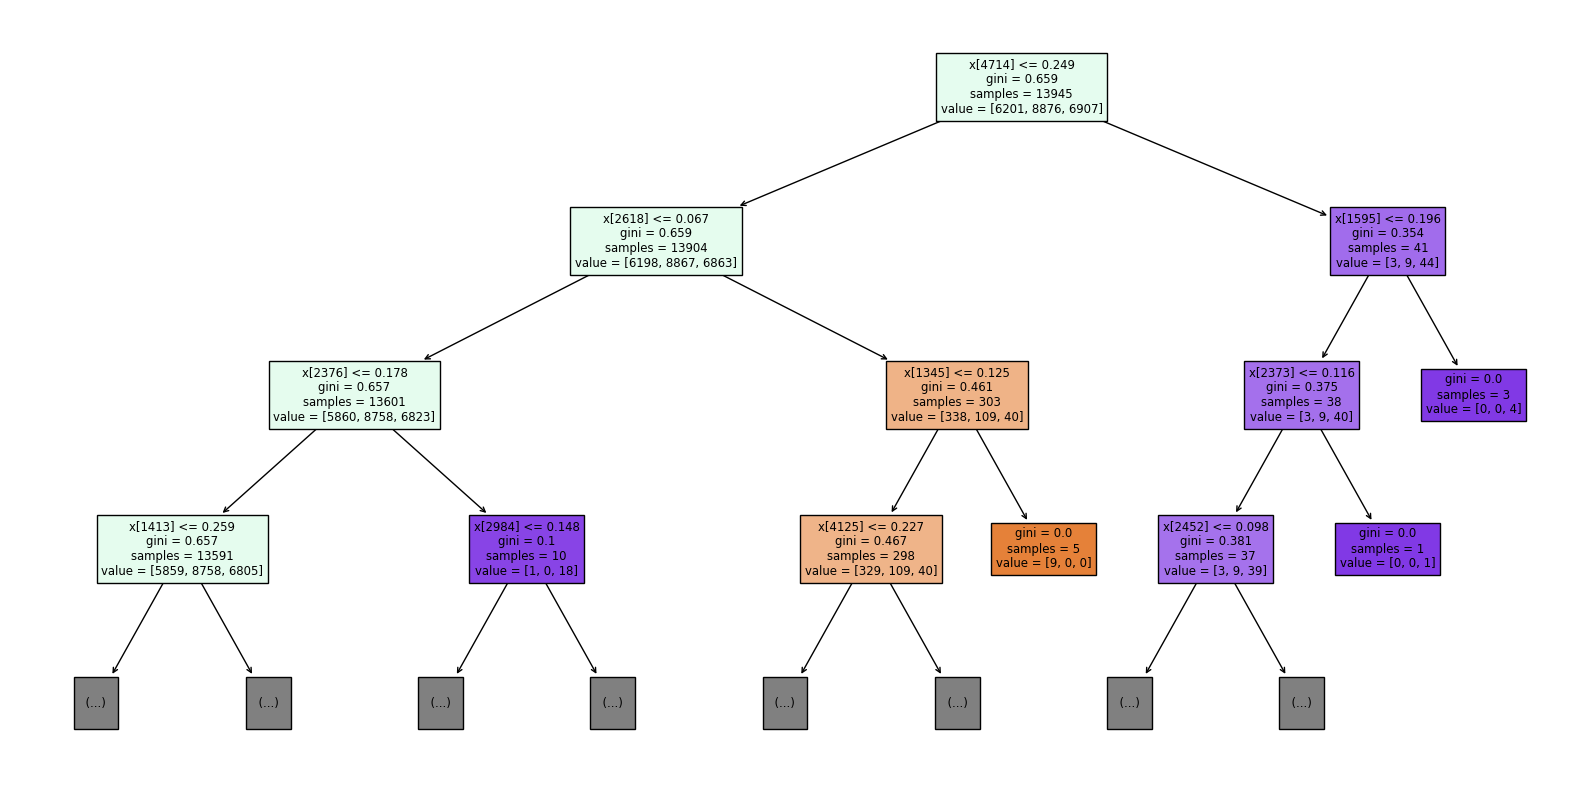

In [105]:
import matplotlib.pyplot as plt
from sklearn import tree

# Draw a tree diagram for one of the decision trees in the Random Forest
# Selecting the first tree (index 0) from the ensemble
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
tree.plot_tree(random_forest_classifier.estimators_[0], filled=True, max_depth=3)  # Limit depth to 3 for example
plt.show()


MultinomialNB Classifier:
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.48      0.58      1572
     neutral       0.57      0.78      0.65      2236
    positive       0.73      0.61      0.66      1688

    accuracy                           0.64      5496
   macro avg       0.68      0.62      0.63      5496
weighted avg       0.66      0.64      0.64      5496



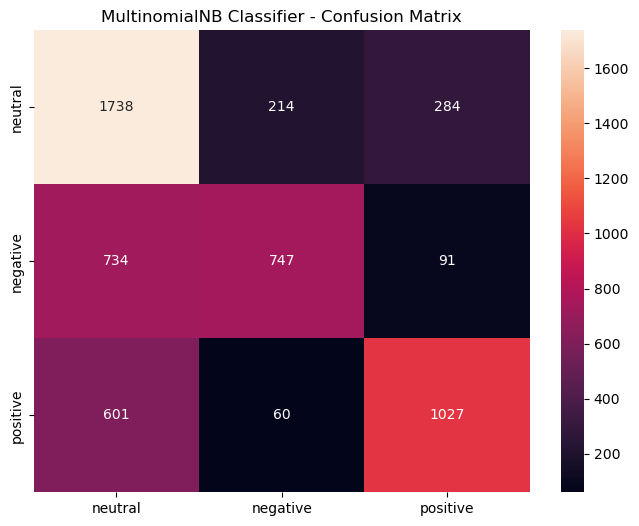

In [106]:
# Instantiate Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_classifier = MultinomialNB()

# Train and evaluate Multinomial Naive Bayes classifier
train_and_evaluate_classifier(multinomial_nb_classifier, "MultinomialNB")

In [107]:
# Make predictions on new data
new_data = ["the place is good", "worst experience","its ok"]
new_data_tfidf = tfidf_vectorizer.transform(new_data)

print("\nPredictions on New Data:")
for text, prediction in zip(new_data, logistic_regression_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Logistic Regression): {prediction}")

for text, prediction in zip(new_data, svm_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (SVM): {prediction}")

for text, prediction in zip(new_data, random_forest_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Random Forest): {prediction}")

for text, prediction in zip(new_data, multinomial_nb_classifier.predict(new_data_tfidf)):
    print(f"Text: {text}, Predicted Sentiment (Naive Bayes): {prediction}")



Predictions on New Data:
Text: the place is good, Predicted Sentiment (Logistic Regression): positive
Text: worst experience, Predicted Sentiment (Logistic Regression): negative
Text: its ok, Predicted Sentiment (Logistic Regression): neutral
Text: the place is good, Predicted Sentiment (SVM): positive
Text: worst experience, Predicted Sentiment (SVM): negative
Text: its ok, Predicted Sentiment (SVM): neutral
Text: the place is good, Predicted Sentiment (Random Forest): positive
Text: worst experience, Predicted Sentiment (Random Forest): negative
Text: its ok, Predicted Sentiment (Random Forest): neutral
Text: the place is good, Predicted Sentiment (Naive Bayes): positive
Text: worst experience, Predicted Sentiment (Naive Bayes): negative
Text: its ok, Predicted Sentiment (Naive Bayes): neutral


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the text data
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(cleaned_df['clean_text'])  # Assuming 'data' is your DataFrame

# Step 2: Scale the feature vectors (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Step 3: Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

# Step 4: Analyze the clusters
clusters = kmeans.labels_
cleaned_df['cluster'] = clusters

# Print cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Print cluster sizes
print("Cluster sizes:")
print(data['cluster'].value_counts())


C:\Users\JIJI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf.toarray())  # Convert sparse matrix to dense array

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Assuming 3 clusters
    plt.scatter(X_train_tfidf_pca[cluster_labels == cluster, 0], X_train_tfidf_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster}', alpha=0.5)

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
#kmeans prediction
## Transform new data using TF-IDF vectorizer
new_data_tfidf = tfidf_vectorizer.transform(new_data)

# Predict cluster labels for new data
new_data_cluster_labels = kmeans.predict(new_data_tfidf)

# Map cluster labels to sentiments
predicted_sentiments = [cluster_sentiments[label] for label in new_data_cluster_labels]

# Print predicted sentiments for new data
for text, sentiment in zip(new_data, predicted_sentiments):
    print(f"Text: {text}, Predicted Sentiment (K-Means): {sentiment}")


In [ ]:
# Pickle the trained model
import pickle
with open("trained_model.pkl", "wb") as f:
    pickle.dump(random_forest_classifier, f)

In [ ]:
#acuuracy comparison diagram
import seaborn as sns
import matplotlib.pyplot as plt

# Define classifier names and accuracies
classifier_names = ["logistic_regression_classifier", "svm_classifier", "random_forest_classifier"]  # Replace with your classifier names
accuracies = [0.85, 0.78, 0.92]  # Replace with your classifier accuracies

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


In [ ]:
# Define a dictionary of models and hyperparameters to test
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': list(range(100, 500)),  # Provide a list of choices
            'max_depth': [None, 10, 20, 30, 40, 50],
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization parameter
        }
    }
}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
# Assuming the dataset is loaded into a DataFrame named df
# The DataFrame should have two columns: 'text' and 'sentiment'
# 'text' contains the text data and 'sentiment' contains the sentiment labels
# Example:
# df = pd.read_csv('dataset.csv')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define models and their parameter grids for hyperparameter tuning
models = {
    'SVM': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    }
}

# Iterate through the models, perform hyperparameter tuning using RandomizedSearchCV, train, and evaluate them
for model_name, config in models.items():
    model = config['model']
    params = config['params']

    # Hyperparameter tuning using RandomizedSearchCV
    random_search = RandomizedSearchCV(model, params, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=101)
    random_search.fit(X_train_tfidf, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Predict on the validation set
    y_val_pred = best_model.predict(X_test_tfidf)

    # Calculate accuracy and F1 score on the validation set
    accuracy = accuracy_score(y_test, y_val_pred)
    f1 = f1_score(y_test, y_val_pred, average='weighted')

    # Print the results
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Accuracy on Test Set: {accuracy:.2f}")
    print(f"F1 Score on Test Set: {f1:.2f}")

    # Add classification report for more details
    print("\nClassification Report on Test Set:")
    report = classification_report(y_test, y_val_pred)
    print(report)

    print("-" * 50)
